In [1]:
import sys
import numpy as np
import math
sys.path.append("../build/python")  # set to correct path for module
import xfacpy

In [2]:
def ft(r):
    return np.exp(-np.linalg.norm(r)**2)
grid = xfacpy.QuanticsGrid(-40, 40, 12, 3, True);
def fq(id):
    return ft(grid.id_to_coord(id))
pivots = [grid.coord_to_id([x,y,z]) for x in [-1,1] for y in [-1,1] for z in [-1,1]]

In [5]:
p = xfacpy.TensorCI2Param()
p.bondDim=60
p.reltol=1e-14
p.pivot1=pivots[0]
p.fullPiv=True
p.useCachedFunction=False
dims=[grid.tensorLocDim]*grid.tensorLen 
ci=xfacpy.TensorCI2(fq, dims, p)
ci.addPivotsAllBonds(pivots);
while not ci.isDone(): 
    ci.iterate()

In [6]:
[ci.tt.sum1()*grid.deltaVolume, np.pi**(1.5)]

[5.569308655313949, 5.568327996831708]

## Now using the QTensorCI

In [11]:
def ft(r):
    return np.exp(-np.linalg.norm(r)**2)

grid=xfacpy.QuanticsGrid(a=-40, b=40, nBit=20, dim=3, pack=True)
points = [[x,y,z] for x in [-1,1] for y in [-1,1] for z in [-1,1]]


p = xfacpy.TensorCI2Param()
p.pivot1=grid.coord_to_id(points[0])
p.bondDim=120
p.useCachedFunction=False

ci=xfacpy.QTensorCI(ft, grid, p)
ci.addPivotPoints(points)
while not ci.isDone():
    ci.iterate()

In [13]:
[ci.get_qtt().integral(), np.pi**(1.5)]

[5.568327356602955, 5.568327996831708]

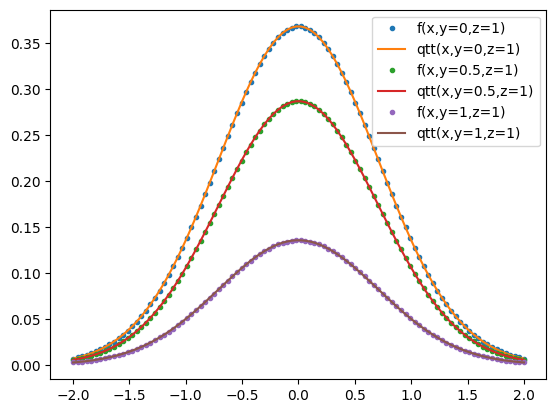

In [25]:
import matplotlib.pyplot as plt
qtt=ci.get_qtt()
xs=np.linspace(-2,2,100)
for y in [0,0.5,1]:
    fs=[ft([x,y,1]) for x in xs]
    tts=[qtt.eval([x,y,1]) for x in xs]
    
    plt.plot(xs,fs, '.', label=f'f(x,y={y},z=1)')
    plt.plot(xs,tts,'-', label=f'qtt(x,y={y},z=1)')
plt.legend()